<h1>Дипломная работа по курсу "Python для анализа данных"

<h3>Выполнил: Савилов М.В. группа PYDA-9

In [1]:
import pandas as pd
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np
import researchpy as rp

<h3> 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

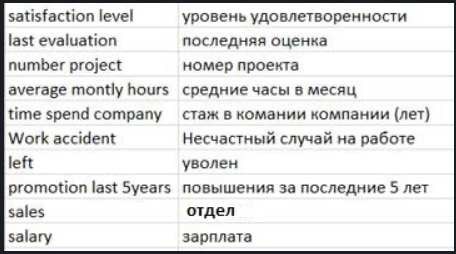

In [2]:
Image('Без названия.png')

In [3]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
print(len(data)) #количество записей

14999


In [5]:
data.isna().sum() #проверка на наличие пропущенных данных

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
data.isnull().sum() #проверка на NULL значения

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
data.duplicated().sum() #проверка на наличие дубликатов

3008

In [8]:
duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['average_montly_hours', "satisfaction_level", "last_evaluation"], ascending= False) 
duplicated.head(20) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium
566,0.11,0.79,7,310,4,0,1,0,hr,low
12566,0.11,0.79,7,310,4,0,1,0,hr,low
14777,0.11,0.79,7,310,4,0,1,0,hr,low
1939,0.10,0.79,7,310,4,0,1,0,hr,medium
14975,0.10,0.79,7,310,4,0,1,0,hr,medium
493,0.10,0.94,6,309,4,0,1,0,technical,medium
12493,0.10,0.94,6,309,4,0,1,0,technical,medium
14704,0.10,0.94,6,309,4,0,1,0,technical,medium


видим, что в датасете много идентичных данных по сотрудникам, скорее всего к дубликатам привело объединения данных из нескольких источников

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()
#исключим дубликаты

0

In [10]:
print(len(data))
#количество уникальных данных после проверки и чистки датасета

11991


In [11]:
salary = data.salary.unique()
sales = data.sales.unique()

заменю значения в "sales" и "salary" на циферные эквиваленты, чтобы можно было использовать их в статистических расчётах

In [12]:
for i in range(len(salary)):
    data.replace(salary[i], i+1, inplace=True)
for i in range(len(sales)):
    data.replace(sales[i], i+1, inplace=True)    

In [14]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


<h3>2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [15]:
#напишу шункцию для расчёта ститистических значений
def stat_def(value):
    try:
        return st.mean(value), st.median(value), st.mode(value), value.min(), value.max(), st.pstdev(value)
    except:
        return st.mean(value), st.median(value), 'ERROR', value.min(), value.max(), st.pstdev(value)

Так как для колонки average_montly_hours мода выдавала ошибку 'No unique mode; found 2 equally common values', то пришлось добавить в функцию обработчик ошибки

In [16]:
headers = list(data.columns.values)
index = ['mean', 'median', 'mode', 'min', 'max', 'std']

In [17]:
df_temp = []
for i in headers:
    df_temp.append(stat_def(data[i]))
df = pd.DataFrame(data=df_temp, columns=index, index=headers)
print(df)

                             mean  median   mode    min    max        std
satisfaction_level       0.629658    0.66   0.74   0.09    1.0   0.241060
last_evaluation          0.716683    0.72   0.55   0.36    1.0   0.168336
number_project           3.802852    4.00      4   2.00    7.0   1.163190
average_montly_hours   200.473522  200.00  ERROR  96.00  310.0  48.725781
time_spend_company       3.364857    3.00      3   2.00   10.0   1.330184
Work_accident            0.154282    0.00      0   0.00    1.0   0.361219
left                     0.166041    0.00      0   0.00    1.0   0.372118
promotion_last_5years    0.016929    0.00      0   0.00    1.0   0.129007
sales                    4.361438    4.00      1   1.00   10.0   2.826592
salary                   1.603870    2.00      1   1.00    3.0   0.635873


<h3>3. Рассчитать и визуализировать корреляционную матрицу для переменных

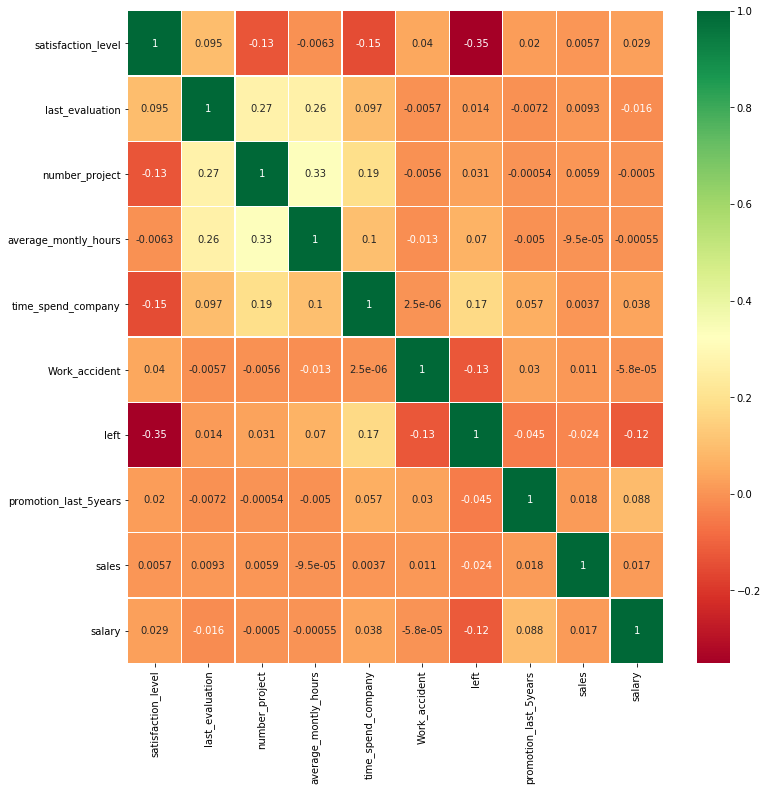

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Матрица корреляции показывает нам, что связь между аргументами очень слабая. Самая "большая" связь между satisfaction_level и left, но она относится к слабой отрицательной связи 

<h3>4. Визуализировать несколько взаимосвязей между переменными

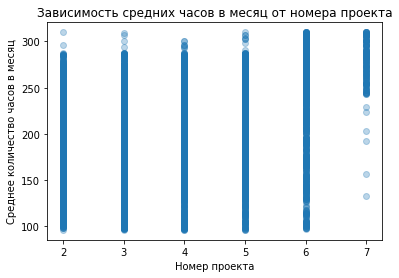

In [20]:
average_montly_hours = data['average_montly_hours']
number_project = data['number_project']
plt.scatter(number_project, average_montly_hours, alpha=0.3)
plt.title('Зависимость средних часов в месяц от номера проекта')
plt.xlabel('Номер проекта')
plt.ylabel('Среднее количество часов в месяц')
plt.show()

По графику мы можем сделать выводы, что те, кто работает над 7 проектом почти всегда работают более 250 часов в месяц, что больше среднего уровня занятости в компании. Это может сказать нам о том, что на этом проекте не хватает сотрудников. 

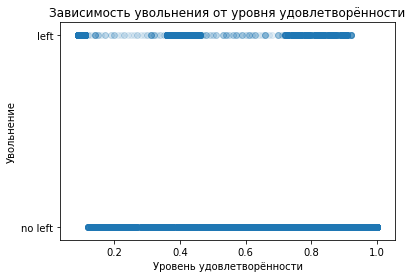

In [22]:
satisfaction_level = data['satisfaction_level']
left = data['left']
plt.scatter(satisfaction_level, left, alpha=0.1)
plt.title('Зависимость увольнения от уровня удовлетворённости')
plt.yticks([0,1],['no left', 'left'])
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Увольнение')
plt.show()

По графику мы можем увидеть "интересные" выводы. Что больше всего увольнений происходит, помимо очень низкой удовлетворённость, на уровнях удовлетворённости близких к 0.4 и 0.8.
Опытным путём установим, что дополнительным фактором, влияющим на увольнение является уровень "переработки"(превышение среднего уровня работы в месяц)

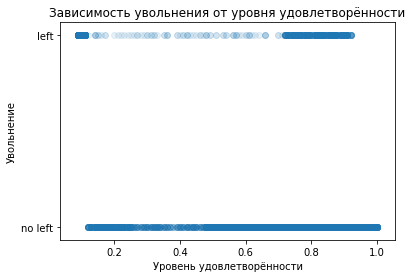

In [32]:
satisfaction_level = data[data['average_montly_hours']>=200]['satisfaction_level']
left = data[data['average_montly_hours']>=200]['left']
plt.scatter(satisfaction_level, left, alpha=0.1)
plt.title('Зависимость увольнения от уровня удовлетворённости')
plt.yticks([0,1],['no left', 'left'])
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Увольнение')
plt.show()

На основании этих данных сделаем вывод. Что для сотрудников, которые не работают больше 200 часов в месяц, критическим уровнем удовлетворённости, при котором они чаще всего увольняются, является ниже является 0.5
Те же, кторегулярно перерабатывает, увольняются при уровнях удовлетворения от работы 0.9 и ниже

<h3>5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)

Использую данные, полученные из предыдущего раздела, проверим с помощью ttest гипотезу, что уровнень удовольствия не влияет на числов увольнений

In [38]:
low_happy = data[data['satisfaction_level']<=0.4]['left']
normal_happy = data[(data['satisfaction_level']>0.4) & (data['satisfaction_level']<=0.8)]['left']
hugh_happy = data[data['satisfaction_level']>0.8]['left']
stats.f_oneway(low_happy, normal_happy, hugh_happy)

F_onewayResult(statistic=829.4594753887988, pvalue=0.0)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий в количестве увольнений с разным уровнем счастья

<h3>6. Рассчитать сколько работников работает в каждом департаменте

возвращаю первоначальные значения в "sales" и "salary"

In [56]:
for i in range(len(salary)):
    data['salary'].replace(i+1, salary[i], inplace=True)
for i in range(len(sales)):
    data['sales'].replace(i+1, sales[i], inplace=True)    
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
data.sales.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

По распределению сотрудников по отделам, предположу, что датасет собран на основе данных компании занимающейся либо производством технически сложных механизмов(машины, компьютеры и тд), либо работой в IT: самое большое количество сотрудников в отдела продаж, техническом и отделе поддержки.

<h3>7. Показать распределение сотрудников по зарплатам

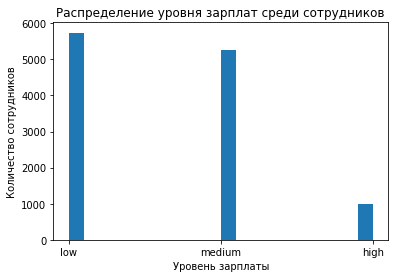

In [44]:
plt.hist(data.salary, 20)
plt.title("Распределение уровня зарплат среди сотрудников")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество сотрудников")
plt.show()

Мы видим достаточно стандартную картину, когда в компании число сотрудников получающих низкую и среднюю зарплату примерно равно, а число специалистов с высокой зарплатой не превышает 10%.

<h3>8. Показать распределение сотрудников по зарплатам совместно с департаментами

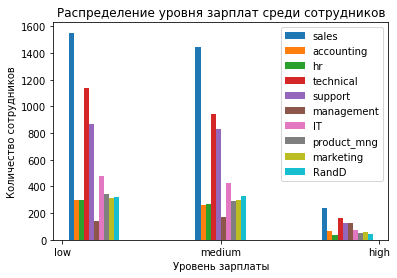

In [53]:
df = [data[data['sales'] == sales[i]]['salary'] for i in range(len(sales))]
plt.hist(df, 5, label=sales)
plt.title("Распределение уровня зарплат среди сотрудников")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество сотрудников")
plt.legend()
plt.show()

По графику мы можем увидеть, что больше всего зарплаты(в процентом соотношении) у сотрудников отдела Менеджмент.
По остальным отделам мы видим примерно одинаковое распределение количества подчинённых и начальников по отделам.

<h3>9. Сколько сотрудников покинули компанию

In [42]:
count_left = data[data['left']==1]['left'].count()
print(f"Компанию покинуло - {count_left} человека")

Компанию покинуло - 1991 человека


In [43]:
max_age = max(data['time_spend_company'])
print(f"Максимальное количество лет, которые работает сотрудник в компании: {max_age}")

Максимальное количество лет, которые работает сотрудник в компании: 10


Расчитаю коэффициент текучести кадров = ((число уволившихся сотрудников / число сотрудников) / количество лет в компании) * 100

In [48]:
print(f"Коэффициент текучести кадров: {round(((count_left/len(data))/max_age)*100,2)}%")

Коэффициент текучести кадров: 1.66%


<h3>10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

<h5>10.1 Проверим гипотезу, что люди с низкой зарплатой чаще увольняются

In [62]:
normal = data[data['salary']!='low'].left
low = data[data['salary']=='low'].left
descriptives, results = rp.ttest(low, normal)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   5740.0  0.204530  0.403393  0.005324   0.194092  0.214967
1      left   6251.0  0.130699  0.337098  0.004264   0.122341  0.139057
2  combined  11991.0  0.166041  0.372133  0.003398   0.159380  0.172703
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.0738
1        Degrees of freedom =   11989.0000
2                         t =      10.9060
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.1994
7                 Hedge's g =       0.1994
8             Glass's delta =       0.1830
9                         r =       0.0991


pvalue <0.05, поэтому мы можем сказать, что наша гипотеза верна, и сотрудники с низкой зарплатой увольняются чаще.

<h5>10.2 Проверим гипотезу, что люди, которые работают больше среднего количества часов в месяц, чаще увольняются

In [61]:
work = data[data['average_montly_hours']<=200].left
hard_work = data[data['average_montly_hours']>200].left
descriptives, results = rp.ttest(hard_work, work)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   5946.0  0.181803  0.385714  0.005002   0.171997  0.191609
1      left   6045.0  0.150538  0.357627  0.004600   0.141521  0.159555
2  combined  11991.0  0.166041  0.372133  0.003398   0.159380  0.172703
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.0313
1        Degrees of freedom =   11989.0000
2                         t =       4.6038
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.0841
7                 Hedge's g =       0.0841
8             Glass's delta =       0.0811
9                         r =       0.0420


pvalue <0.05, поэтому мы можем сказать, что наша гипотеза верна, и сотрудники, которые работают больше среднего уровня часов в месяц, увольняются чаще.

<h3>11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте